# CNNs

In this notebook you will learn how to build Convolutional Neural Networks (CNNs) for image processing.

## Imports

In [11]:
%matplotlib inline

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time
import seaborn as sns
sns.set()

In [13]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
sklearn 0.20.1
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [14]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

### Simple CNN

Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [15]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[:-5000] / 255
y_train = y_train_full[:-5000]

X_valid = X_train_full[-5000:] / 255
y_valid = y_train_full[-5000:]

X_test = X_test / 255

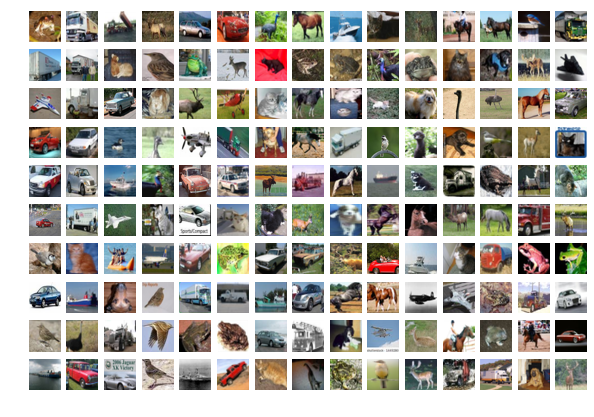

In [17]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

Let's print the classes of the images in the first row:

In [18]:
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog truck truck deer automobile automobile bird horse ship cat deer horse horse bird truck 

### 1.  Baseline Model

Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

In [22]:
model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 4s 82us/sample - loss: 1.8995 - accuracy: 0.3133 - val_loss: 1.8570 - val_accuracy: 0.3368
Epoch 2/5
45000/45000 [==============================] - 3s 77us/sample - loss: 1.7134 - accuracy: 0.3834 - val_loss: 1.7347 - val_accuracy: 0.3782
Epoch 3/5
45000/45000 [==============================] - 4s 79us/sample - loss: 1.6369 - accuracy: 0.4152 - val_loss: 1.6705 - val_accuracy: 0.4022
Epoch 4/5
45000/45000 [==============================] - 4s 79us/sample - loss: 1.5826 - accuracy: 0.4356 - val_loss: 1.6407 - val_accuracy: 0.4118
Epoch 5/5
45000/45000 [==============================] - 3s 77us/sample - loss: 1.5412 - accuracy: 0.4512 - val_loss: 1.5708 - val_accuracy: 0.4322


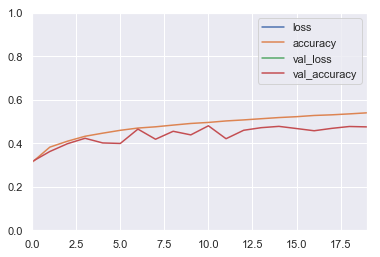

In [13]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

--------

### 2. Convolution 2D, Pool2D
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

In [26]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=32,\
                        kernel_size=3,\
                        padding="same",\
                        activation="relu",\
                        input_shape=[32, 32, 3]),
    
    keras.layers.Conv2D(filters=32,\
                        kernel_size=3,\
                        padding="same",\
                        activation="relu"),
    
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64,\
                        kernel_size=3,\
                        padding="same",\
                        activation="relu"),
    
    keras.layers.Conv2D(filters=64,\
                        kernel_size=3,\
                        padding="same",\
                        activation="relu"),
    
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128,\
                       activation="relu"),
    
    keras.layers.Dense(10,\
                       activation="softmax")
])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [29]:
# Number of params in a convolutional layer =
# (kernel_width * kernel_height * channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1)  * 32  # in: 32x32x3   out: 32x32x32  Conv2D
  + (3 * 3 * 32 + 1) * 32  # in: 32x32x32  out: 32x32x32  Conv2D
  + 0                      # in: 32x32x32  out: 16x16x32  MaxPool2D
  + (3 * 3 * 32 + 1) * 64  # in: 16x16x32  out: 16x16x64  Conv2D
  + (3 * 3 * 64 + 1) * 64  # in: 16x16x64  out: 16x16x64  Conv2D
  + 0                      # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                      # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128       # in: 4096      out: 128       Dense
  + (128 + 1) * 10         # in: 128       out: 10        Dense
)

591274

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

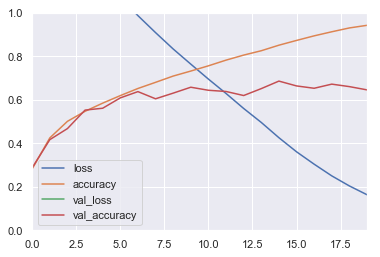

In [16]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

----------

### Bathch Normalization
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

In [35]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=32,
                        kernel_size=3,
                        padding="same",
                        activation="relu",
                        input_shape=[32, 32, 3]),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=32,
                        kernel_size=3,
                        padding="same",
                        activation="relu"),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64,
                        kernel_size=3,
                        padding="same",
                        activation="relu"),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64,
                        kernel_size=3,
                        padding="same",
                        activation="relu"),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128,
                       activation="relu"),
    
    keras.layers.Dense(10,
                       activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)       

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 200s 4ms/sample - loss: 1.3322 - accuracy: 0.5241 - val_loss: 1.1734 - val_accuracy: 0.5886
Epoch 2/5
45000/45000 [==============================] - 196s 4ms/sample - loss: 0.9282 - accuracy: 0.6724 - val_loss: 1.2601 - val_accuracy: 0.5818
Epoch 3/5
45000/45000 [==============================] - 192s 4ms/sample - loss: 0.7463 - accuracy: 0.7366 - val_loss: 0.8385 - val_accuracy: 0.7084
Epoch 4/5
  384/45000 [..............................] - ETA: 3:01 - loss: 0.6666 - accuracy: 0.7630

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

## Object Detection Project

The Google [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/) (SVHN) dataset contains pictures of digits in all shapes and colors, taken by the Google Street View cars. The goal is to classify and locate all the digits in large images.
* Train a Fully Convolutional Network on the 32x32 images.
* Use this FCN to build a digit detector in the large images.